In [62]:
import os
import pandas, numpy, seaborn
import sklearn, sklearn.decomposition, sklearn.decomposition, sklearn.pipeline, sklearn.preprocessing
import scipy, scipy.signal
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'xtick.labelsize':30, 'ytick.labelsize':30, 'axes.labelsize':40, 'figure.figsize':(12, 8)})
import cycler
import pandas as pd
import re 
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
import numpy as np
from sklearn.preprocessing import QuantileTransformer

In [2]:
'''

# Open GDC manifest file.
mf_name = input('Write manifest file name: ') 
data = pd.read_csv(mf_name,delimiter='\t')

# Directory where the files are saved.  
output_directory = "/Users/ASUS/Documents/bioinf/data"
os.makedirs(output_directory, exist_ok=True)

count = 0
for _, row in data.iterrows():
    # Loop through the file IDs and download each file.
    file_id = str(row[0])  
    data_endpt = "https://api.gdc.cancer.gov/data/{}".format(file_id)
    response = requests.get(data_endpt, headers={"Content-Type": "application/json"})

    # Check if the request was successful before proceeding.
    if response.status_code == 200:
        # The file name can be found in the header within the Content-Disposition key.
        response_head_cd = response.headers.get("Content-Disposition")
        if response_head_cd:
            file_name = re.findall("filename=(.+)", response_head_cd)[0]

            # Join the directory path with the file name to create the complete file path.
            output_file_path = os.path.join(output_directory, file_name)

            with open(output_file_path, "wb") as output_file:
                output_file.write(response.content)
                count = count + 1
                print(f"Downloaded file nº {count}: {file_name} " )
        else:
            print(f"Failed to get file name for file ID: {file_id}")
    else:
        print(f"Failed to download file ID: {file_id} - Status Code: {response.status_code}")'''



'\n\n# Open GDC manifest file.\nmf_name = input(\'Write manifest file name: \') \ndata = pd.read_csv(mf_name,delimiter=\'\t\')\n\n# Directory where the files are saved.  \noutput_directory = "/Users/ASUS/Documents/bioinf/data"\nos.makedirs(output_directory, exist_ok=True)\n\ncount = 0\nfor _, row in data.iterrows():\n    # Loop through the file IDs and download each file.\n    file_id = str(row[0])  \n    data_endpt = "https://api.gdc.cancer.gov/data/{}".format(file_id)\n    response = requests.get(data_endpt, headers={"Content-Type": "application/json"})\n\n    # Check if the request was successful before proceeding.\n    if response.status_code == 200:\n        # The file name can be found in the header within the Content-Disposition key.\n        response_head_cd = response.headers.get("Content-Disposition")\n        if response_head_cd:\n            file_name = re.findall("filename=(.+)", response_head_cd)[0]\n\n            # Join the directory path with the file name to create the

In [3]:
#also download metadata and try to associate patient ID's with case ID's

In [4]:
# Get the list of all files and directories
# in the root directory
path = "/Users/ASUS/Documents/bioinf/data"
dir_list = os.listdir(path)
  
print("Files and directories in '", path, "' :") 
  
# print the list
#print(dir_list)

Files and directories in ' /Users/ASUS/Documents/bioinf/data ' :


In [5]:
#We use a for loop to create a list containing the names of the files in our directory

#for element in dir_list:
    #print(element)


In [6]:

concat_df=pandas.DataFrame()
print(type(concat_df))
for element in dir_list[:100]: 
    #We first visualize the name of the file 
    #print(element)

    #specify path
    path_to_data="C:/Users/ASUS/Documents/bioinf/data/"
    full_path=path_to_data+element
    

    #Create a dataframe of that file
    df = pandas.read_csv(full_path, sep="\t",skiprows=1, index_col=0)
    df.drop(['gene_name', 'gene_type'], axis=1, inplace = True)
    df.drop(['N_unmapped', 'N_multimapping', 'N_noFeature', 'N_ambiguous'], axis=0, inplace= True)
    
    #specify row and column indexes
    #file_id = str(row[1]).split('.')[0]
    
    #take the first column of each one
    expression_column = df['tpm_unstranded']
    expression_column = expression_column.rename(element.split('.')[0])   ######################
    
    if concat_df.shape == (0,0):
        concat_df = expression_column 
        print('starting to construct the concatenated dataframe')
    else:
        concat_df = pandas.concat([concat_df, expression_column], axis=1)

<class 'pandas.core.frame.DataFrame'>
starting to construct the concatenated dataframe


In [7]:
df

,unstranded,stranded_first,stranded_second,tpm_unstranded,fpkm_unstranded,fpkm_uq_unstranded
gene_id,,,,,,
ENSG00000000003.15,5770,2826,2944,86.2997,21.1797,21.4945
ENSG00000000005.6,1,0,1,0.0460,0.0113,0.0114
ENSG00000000419.13,1678,784,894,94.3173,23.1473,23.4914
ENSG00000000457.14,1161,923,849,11.4436,2.8085,2.8502
ENSG00000000460.17,259,478,457,2.9433,0.7223,0.7331
...,...,...,...,...,...,...
ENSG00000288669.1,0,0,0,0.0000,0.0000,0.0000
ENSG00000288670.1,385,193,210,14.4547,3.5475,3.6002
ENSG00000288671.1,0,0,0,0.0000,0.0000,0.0000


In [8]:
concat_df

,00f54652-691e-4446-869a-4dd51c236f56,017f7806-7804-43b9-8123-e1b48d2d6496,02baceff-cbab-41cb-b801-be18ad6991b2,036f7712-a636-4198-b568-6c85d9db4a3b,0386037f-728c-47b0-93d0-6bb81b8b2a05,04bbfd91-0b04-4659-a32b-ee3afbc1f30e,04c7e26b-8546-47ca-b612-c05d7923cffc,05c2e90c-544c-425c-8bc2-961653ee1e7b,05e8a50c-4478-4d28-977b-68cc319493a9,06735819-fc94-4e07-b528-8bea573f5ace,...,2df38eb8-5350-4951-9159-a8add6474efe,2ea7afdd-f947-47e6-9516-b6f38e0a1967,2f8d8fae-944a-4027-a4f7-33357001d63d,30b75646-82f8-467f-8f2b-b71b97af3bc6,311572b6-38d7-4048-92ec-2be5680b5e6e,35289859-058f-47f9-b2ad-b307bb2b73d0,3682a3e2-17ed-4f6c-b4de-9057e6d7f4c6,3762f95e-180b-43c2-967c-0e138fb23b63,37b4e91b-642e-48ec-a36f-bb159f2ddb8a,38272f63-94e2-464a-9cd1-d7fa3530b8b1
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,19.4123,31.8278,80.8500,41.2435,39.2759,59.5595,32.3194,49.0701,49.1113,72.6895,...,50.1828,52.1258,56.3121,31.3678,51.7915,96.7918,22.5834,31.6245,50.1070,86.2997
ENSG00000000005.6,0.1240,0.0574,0.3693,0.1329,0.2247,0.4833,0.1869,0.1058,0.1501,0.0447,...,0.2955,0.1740,0.0621,0.0376,0.0345,0.0000,0.0296,0.0000,0.2095,0.0460
ENSG00000000419.13,40.4957,83.6473,121.4975,57.5444,72.3126,106.6697,86.1143,80.7573,101.3053,84.7645,...,82.7631,77.8748,101.0271,72.4584,72.2127,99.7556,49.0401,92.6351,128.5826,94.3173
ENSG00000000457.14,5.0002,5.2668,14.0190,4.3661,4.4973,13.8262,6.5052,8.5967,9.7299,9.6728,...,4.0100,4.7510,8.8847,3.7651,5.2504,8.9173,2.7227,4.8372,8.7662,11.4436
ENSG00000000460.17,0.7564,1.7167,2.4786,2.0541,0.7963,2.6286,1.0472,2.1619,2.6097,2.9540,...,2.2054,0.8317,1.9965,1.1619,1.6051,2.5046,0.8561,2.0810,1.8557,2.9433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288669.1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0164,0.0000,0.0000,0.0000,0.0000
ENSG00000288670.1,6.7877,8.3903,24.1354,7.5282,18.7211,17.1055,15.1116,13.9104,11.7683,17.1795,...,12.6410,13.4069,19.6864,8.9059,10.4650,13.2976,8.6304,12.1919,9.9803,14.4547
ENSG00000288671.1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [9]:
#convert df to csv.
concat_df.to_csv('/Users/ASUS/Documents/bioinf/tpm.csv')

In [55]:
tpm = pandas.read_csv('/Users/ASUS/Documents/bioinf/tpm.csv', index_col=0)
print(tpm.shape)
tpm.head()

(60660, 100)


,00f54652-691e-4446-869a-4dd51c236f56,017f7806-7804-43b9-8123-e1b48d2d6496,02baceff-cbab-41cb-b801-be18ad6991b2,036f7712-a636-4198-b568-6c85d9db4a3b,0386037f-728c-47b0-93d0-6bb81b8b2a05,04bbfd91-0b04-4659-a32b-ee3afbc1f30e,04c7e26b-8546-47ca-b612-c05d7923cffc,05c2e90c-544c-425c-8bc2-961653ee1e7b,05e8a50c-4478-4d28-977b-68cc319493a9,06735819-fc94-4e07-b528-8bea573f5ace,...,2df38eb8-5350-4951-9159-a8add6474efe,2ea7afdd-f947-47e6-9516-b6f38e0a1967,2f8d8fae-944a-4027-a4f7-33357001d63d,30b75646-82f8-467f-8f2b-b71b97af3bc6,311572b6-38d7-4048-92ec-2be5680b5e6e,35289859-058f-47f9-b2ad-b307bb2b73d0,3682a3e2-17ed-4f6c-b4de-9057e6d7f4c6,3762f95e-180b-43c2-967c-0e138fb23b63,37b4e91b-642e-48ec-a36f-bb159f2ddb8a,38272f63-94e2-464a-9cd1-d7fa3530b8b1
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,19.4123,31.8278,80.8500,41.2435,39.2759,59.5595,32.3194,49.0701,49.1113,72.6895,...,50.1828,52.1258,56.3121,31.3678,51.7915,96.7918,22.5834,31.6245,50.1070,86.2997
ENSG00000000005.6,0.1240,0.0574,0.3693,0.1329,0.2247,0.4833,0.1869,0.1058,0.1501,0.0447,...,0.2955,0.1740,0.0621,0.0376,0.0345,0.0000,0.0296,0.0000,0.2095,0.0460
ENSG00000000419.13,40.4957,83.6473,121.4975,57.5444,72.3126,106.6697,86.1143,80.7573,101.3053,84.7645,...,82.7631,77.8748,101.0271,72.4584,72.2127,99.7556,49.0401,92.6351,128.5826,94.3173
ENSG00000000457.14,5.0002,5.2668,14.0190,4.3661,4.4973,13.8262,6.5052,8.5967,9.7299,9.6728,...,4.0100,4.7510,8.8847,3.7651,5.2504,8.9173,2.7227,4.8372,8.7662,11.4436
ENSG00000000460.17,0.7564,1.7167,2.4786,2.0541,0.7963,2.6286,1.0472,2.1619,2.6097,2.9540,...,2.2054,0.8317,1.9965,1.1619,1.6051,2.5046,0.8561,2.0810,1.8557,2.9433


In [57]:
#bring data to log2 TPM +1
log2_tpm_PO = numpy.log2(tpm + 1)
log2_tpm_PO

'''here we have 60660 genes, we will eliminate the ones that are lowly expressed'''

,00f54652-691e-4446-869a-4dd51c236f56,017f7806-7804-43b9-8123-e1b48d2d6496,02baceff-cbab-41cb-b801-be18ad6991b2,036f7712-a636-4198-b568-6c85d9db4a3b,0386037f-728c-47b0-93d0-6bb81b8b2a05,04bbfd91-0b04-4659-a32b-ee3afbc1f30e,04c7e26b-8546-47ca-b612-c05d7923cffc,05c2e90c-544c-425c-8bc2-961653ee1e7b,05e8a50c-4478-4d28-977b-68cc319493a9,06735819-fc94-4e07-b528-8bea573f5ace,...,2df38eb8-5350-4951-9159-a8add6474efe,2ea7afdd-f947-47e6-9516-b6f38e0a1967,2f8d8fae-944a-4027-a4f7-33357001d63d,30b75646-82f8-467f-8f2b-b71b97af3bc6,311572b6-38d7-4048-92ec-2be5680b5e6e,35289859-058f-47f9-b2ad-b307bb2b73d0,3682a3e2-17ed-4f6c-b4de-9057e6d7f4c6,3762f95e-180b-43c2-967c-0e138fb23b63,37b4e91b-642e-48ec-a36f-bb159f2ddb8a,38272f63-94e2-464a-9cd1-d7fa3530b8b1
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,4.351367,5.036846,6.354911,5.400657,5.331845,5.920281,5.058291,5.645877,5.647064,6.203387,...,5.677587,5.731341,5.840768,5.016487,5.722234,6.611642,4.559700,5.027884,5.675449,6.447905
ENSG00000000005.6,0.168642,0.080521,0.453439,0.180021,0.292428,0.568810,0.247198,0.145090,0.201759,0.063089,...,0.373509,0.231432,0.086920,0.053250,0.048934,0.000000,0.042084,0.000000,0.274411,0.064883
ENSG00000000419.13,5.374890,6.403392,6.936608,5.871459,6.195989,6.750468,6.444838,6.353276,6.676737,6.422309,...,6.388243,6.301493,6.672809,6.198856,6.194022,6.654716,5.645013,6.548978,7.017728,6.574666
ENSG00000000457.14,2.585011,2.647729,3.908717,2.423874,2.458723,3.890077,2.907891,3.262538,3.423565,3.415867,...,2.324811,2.523813,3.305197,2.252506,2.643949,3.309947,1.896349,2.545277,3.287797,3.637332
ENSG00000000460.17,0.812621,1.441855,1.798507,1.610747,0.845028,1.859413,1.033652,1.660792,1.851879,1.983313,...,1.680504,0.873183,1.583278,1.112300,1.381339,1.809250,0.892274,1.623399,1.513844,1.979403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288669.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.023468,0.000000,0.000000,0.000000,0.000000
ENSG00000288670.1,2.961197,3.231171,4.651649,3.092241,4.301668,4.178356,4.010028,3.898247,3.674495,4.184241,...,3.769878,3.848688,4.370611,3.308288,3.519164,3.837701,3.267596,3.721580,3.456846,3.949974
ENSG00000288671.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [58]:
#we filter out genes that are loowly expressed. We fixed a threshold at 8TPMs so we filter from transformed data which is 
#the same as log2(8+1)
log2_tpm_PO[log2_tpm_PO.max(axis=1)>np.log2(8+1)]

'''the genes which we will work with are 15971. '''

,00f54652-691e-4446-869a-4dd51c236f56,017f7806-7804-43b9-8123-e1b48d2d6496,02baceff-cbab-41cb-b801-be18ad6991b2,036f7712-a636-4198-b568-6c85d9db4a3b,0386037f-728c-47b0-93d0-6bb81b8b2a05,04bbfd91-0b04-4659-a32b-ee3afbc1f30e,04c7e26b-8546-47ca-b612-c05d7923cffc,05c2e90c-544c-425c-8bc2-961653ee1e7b,05e8a50c-4478-4d28-977b-68cc319493a9,06735819-fc94-4e07-b528-8bea573f5ace,...,2df38eb8-5350-4951-9159-a8add6474efe,2ea7afdd-f947-47e6-9516-b6f38e0a1967,2f8d8fae-944a-4027-a4f7-33357001d63d,30b75646-82f8-467f-8f2b-b71b97af3bc6,311572b6-38d7-4048-92ec-2be5680b5e6e,35289859-058f-47f9-b2ad-b307bb2b73d0,3682a3e2-17ed-4f6c-b4de-9057e6d7f4c6,3762f95e-180b-43c2-967c-0e138fb23b63,37b4e91b-642e-48ec-a36f-bb159f2ddb8a,38272f63-94e2-464a-9cd1-d7fa3530b8b1
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,4.351367,5.036846,6.354911,5.400657,5.331845,5.920281,5.058291,5.645877,5.647064,6.203387,...,5.677587,5.731341,5.840768,5.016487,5.722234,6.611642,4.559700,5.027884,5.675449,6.447905
ENSG00000000419.13,5.374890,6.403392,6.936608,5.871459,6.195989,6.750468,6.444838,6.353276,6.676737,6.422309,...,6.388243,6.301493,6.672809,6.198856,6.194022,6.654716,5.645013,6.548978,7.017728,6.574666
ENSG00000000457.14,2.585011,2.647729,3.908717,2.423874,2.458723,3.890077,2.907891,3.262538,3.423565,3.415867,...,2.324811,2.523813,3.305197,2.252506,2.643949,3.309947,1.896349,2.545277,3.287797,3.637332
ENSG00000000938.13,2.610275,3.567631,3.186786,4.123310,2.984334,2.235268,2.497919,3.994725,4.796421,3.459327,...,3.579168,2.075396,2.236952,2.475474,3.958267,3.178061,3.947451,4.022971,3.532753,4.451712
ENSG00000000971.16,3.133695,7.188441,5.688273,6.598810,2.575216,6.281372,3.032753,5.202265,5.200881,6.852400,...,6.599481,3.511683,1.721504,4.984289,6.532262,7.809587,4.128302,6.721012,5.459976,5.481057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288547.3,2.705779,0.640251,0.880019,0.882056,4.018892,1.666211,3.430820,3.116897,2.291456,2.582411,...,1.426533,2.579735,0.579856,1.220825,2.383220,2.606205,2.540722,0.995014,1.180466,2.884735
ENSG00000288558.2,1.971516,1.055196,3.231156,1.190488,2.295488,2.777325,2.854036,2.777620,2.761413,2.035237,...,1.457332,3.237763,2.722663,1.513693,1.854355,2.121347,1.628354,1.324350,2.699196,2.614616
ENSG00000288573.1,2.541118,1.498149,3.072192,0.911193,1.917890,1.788477,2.512075,1.611408,1.445356,1.753433,...,1.359690,2.181071,2.647844,1.844104,1.069083,2.098420,1.603644,0.673376,2.649156,2.749470


80


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


17.495234946596284


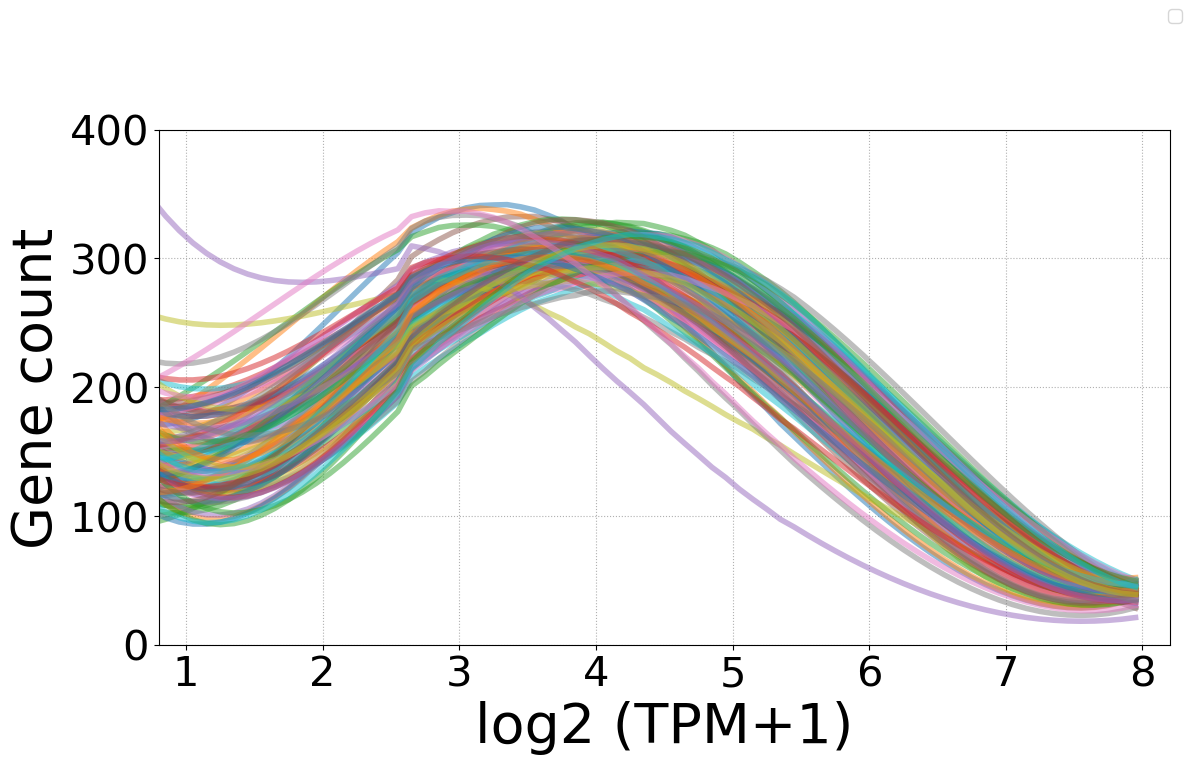

In [13]:
'''HISTOGRAM WITHOUT QUANTILE NORMALIZATION'''

found_max = 8 # especifico el valor màxim aqui. El poso una mica mes alt
number_of_bins = found_max*10
print(number_of_bins)

absolute_max = 0  #defineixo absolute_max = 0
working_samples = log2_tpm_PO.columns.to_list()  #afegeixo les columnes amb les que vull treballar a una llista working_samples

most_likely_expressions = []
all_hats = []
for sample in working_samples:
    
    log2TPM = log2_tpm_PO.loc[:, sample] #selecciono una columna i la guardo a log2TPM
    if max(log2TPM) > absolute_max:   #si el valor maxim de log2TPM és major que l'absolut_max, absolut_max passa a ser aquest valor
        absolute_max = max(log2TPM)
       
    #print(numpy.min(log2TPM), numpy.max(log2TPM))
    
    # agafa el valor de dalt del mig de cada barra
    # agafa els 2 valors dels extrems de baix de cada barra i resta i divideix entre 2 per obtenir un unic valor de baix 
    hist, bin_edges = numpy.histogram(log2TPM, bins=number_of_bins, range=(0, found_max))
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin   
    x = x[:-1]   #elimina l'ultim valor pq no el necessitem
    
    #print(x)   #--> fem un 'print' per veure les dades i agafar el segon pic
    #print(hist)
    
    plotting_x = x#[1:500] #depen de com surti lhistograma agafem a pertir de unes dades o altres 
    plotting_hist = hist
    #print(plotting_x)
    
    #matplotlib.pyplot.plot(plotting_x, plotting_hist,'.', alpha=1/3)
    yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
    matplotlib.pyplot.plot(plotting_x, yhat, '-', lw=4, alpha = 1/2)
    
    most_likely_expression = x[numpy.argmax(yhat)]
    most_likely_expressions.append(most_likely_expression)
    
    all_hats.append(yhat)
    
    
matplotlib.pyplot.xlim([numpy.min(plotting_x)+0.75, numpy.max(plotting_x)+0.25])
matplotlib.pyplot.ylim([0, 400])

matplotlib.pyplot.xlabel('log2 (TPM+1)')
matplotlib.pyplot.ylabel('Gene count')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.legend(ncol=10, fontsize=12, bbox_to_anchor=(1.02, 1.25))

matplotlib.pyplot.tight_layout()

print(absolute_max)
    

In [64]:
quantile_transformer = QuantileTransformer(output_distribution='normal')

# Aplica la normalización de cuantiles
log2_tpm_normalized = quantile_transformer.fit_transform(log2_tpm_PO)

In [70]:
log2_tpm_normalized_df = pd.DataFrame(log2_tpm_normalized)  ################################################3
log2_tpm_normalized_df

######################


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.426175,1.652013,1.849767,1.698238,1.602802,1.742914,1.513887,1.619412,1.637158,1.823305,...,1.740119,1.720972,1.664953,1.605971,1.770105,2.053085,1.601677,1.497237,1.682865,1.823269
1,0.196420,0.087405,0.266130,0.260355,0.387974,0.384927,0.223339,0.158334,0.143136,-0.050201,...,0.403057,0.227238,-0.009489,0.112617,-0.004451,-5.199338,0.055841,-5.199338,0.213839,-0.055267
2,1.762048,2.080324,2.053535,1.876531,1.851422,2.045187,1.988832,1.838547,2.041150,1.900589,...,1.953555,1.886140,1.954007,1.986352,1.926077,2.066680,1.962551,2.007313,2.135418,1.864167
3,0.924294,0.963384,1.060817,0.925702,0.899542,1.108941,0.946044,0.978222,0.987450,0.987299,...,0.886617,0.887775,0.953446,0.912564,0.922487,0.985602,0.867587,0.947005,0.988953,0.983210
4,0.535938,0.737507,0.680269,0.779466,0.599844,0.739757,0.569257,0.717260,0.711992,0.749033,...,0.764215,0.544841,0.635374,0.677211,0.680674,0.728408,0.652273,0.812890,0.664136,0.696026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60655,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-0.092563,-5.199338,-5.199338,-5.199338,-5.199338
60656,1.018851,1.086626,1.265882,1.047489,1.294104,1.175077,1.214458,1.113798,1.036396,1.146488,...,1.215596,1.183177,1.198368,1.138739,1.108978,1.097873,1.183320,1.153772,1.017456,1.044047
60657,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
60658,0.045863,0.012247,-0.086030,-0.023106,0.123362,-0.119172,-0.040912,0.015195,-0.029841,-0.028750,...,-0.036545,0.071204,-0.060611,0.074146,-0.010199,-0.053516,0.016058,0.100297,-0.118232,-0.062421


60


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


5.19933758270342


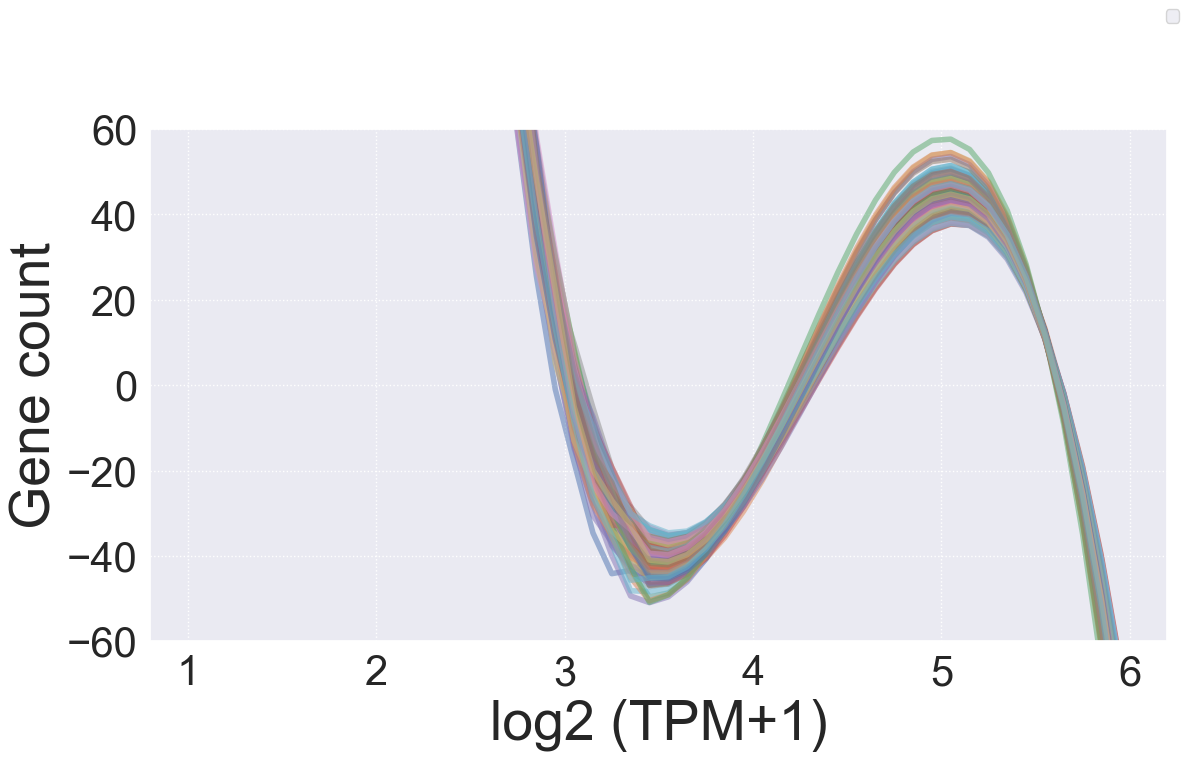

In [80]:
'''HISTOGRAM WITHOUT QUANTILE NORMALIZATION'''

found_max = 6 # especifico el valor màxim aqui. El poso una mica mes alt
number_of_bins = found_max*10
print(number_of_bins)

absolute_max = 0  #defineixo absolute_max = 0
working_samples = log2_tpm_normalized_df.columns.to_list()  #afegeixo les columnes amb les que vull treballar a una llista working_samples

most_likely_expressions = []
all_hats = []
for sample in working_samples:
    
    log2TPM = log2_tpm_normalized_df.loc[:, sample] #selecciono una columna i la guardo a log2TPM
    if max(log2TPM) > absolute_max:   #si el valor maxim de log2TPM és major que l'absolut_max, absolut_max passa a ser aquest valor
        absolute_max = max(log2TPM)
       
    #print(numpy.min(log2TPM), numpy.max(log2TPM))
    
    # agafa el valor de dalt del mig de cada barra
    # agafa els 2 valors dels extrems de baix de cada barra i resta i divideix entre 2 per obtenir un unic valor de baix 
    hist, bin_edges = numpy.histogram(log2TPM, bins=number_of_bins, range=(0, found_max))
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin   
    x = x[:-1]   #elimina l'ultim valor pq no el necessitem
    
    #print(x)   #--> fem un 'print' per veure les dades i agafar el segon pic
    #print(hist)
    
    plotting_x = x#[1:500] #depen de com surti lhistograma agafem a pertir de unes dades o altres 
    plotting_hist = hist
    #print(plotting_x)
    
    #matplotlib.pyplot.plot(plotting_x, plotting_hist,'.', alpha=1/3)
    yhat = scipy.signal.savgol_filter(plotting_hist, 51, 3)
    matplotlib.pyplot.plot(plotting_x, yhat, '-', lw=4, alpha = 1/2)
    
    most_likely_expression = x[numpy.argmax(yhat)]
    most_likely_expressions.append(most_likely_expression)
    
    all_hats.append(yhat)
    
    
matplotlib.pyplot.xlim([numpy.min(plotting_x)+0.75, numpy.max(plotting_x)+0.25])
matplotlib.pyplot.ylim([-60, 60])

matplotlib.pyplot.xlabel('log2 (TPM+1)')
matplotlib.pyplot.ylabel('Gene count')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.legend(ncol=10, fontsize=12, bbox_to_anchor=(1.02, 1.25))

matplotlib.pyplot.tight_layout()

print(absolute_max)
    

In [14]:
#mirem quin és el vallor màxim que tenim abans de fer l'histograma anterior per saber quins paràmetres hem de posar
maxim = max(x)
print(maxim)

7.95


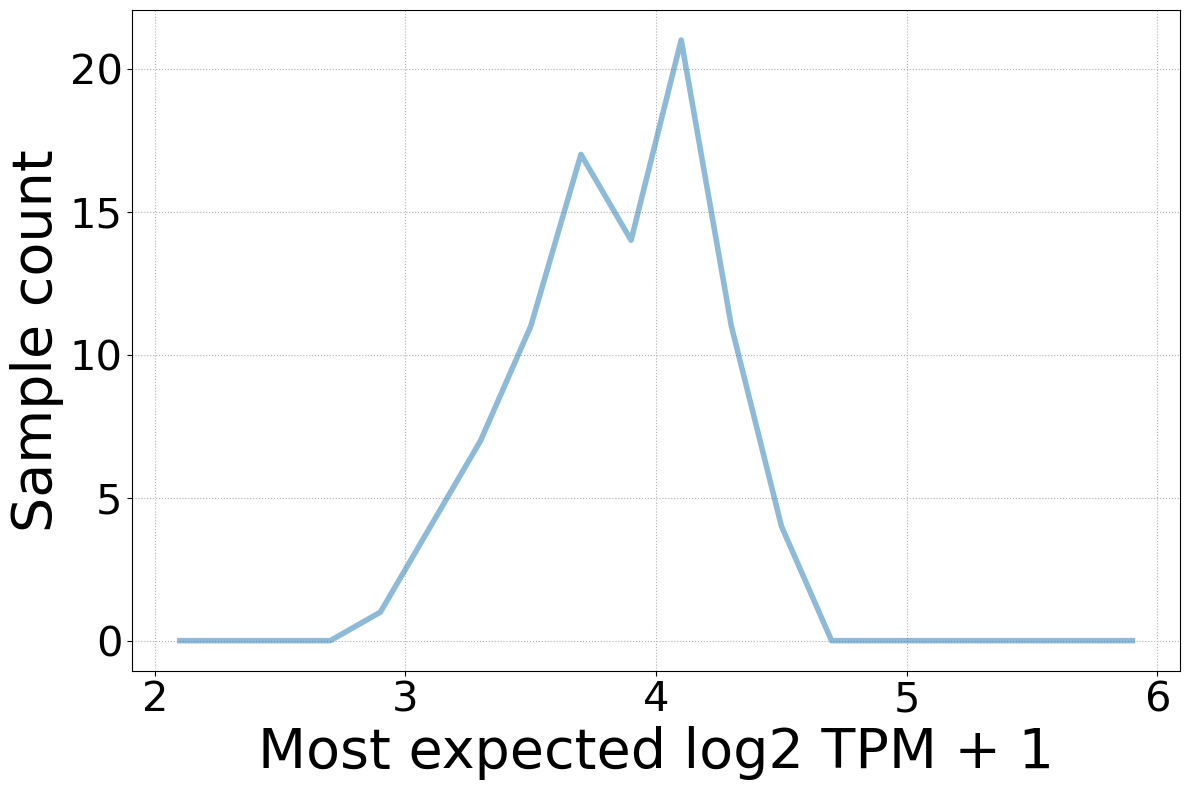

In [15]:
hist, bin_edges = numpy.histogram(most_likely_expressions, bins=20, range=(2, 6))
half_bin = (bin_edges[1] - bin_edges[0])/2
x = bin_edges + half_bin
x = x[:-1]

matplotlib.pyplot.plot(x, hist, '-', lw=4, alpha=1/2)
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.xlabel('Most expected log2 TPM + 1')
matplotlib.pyplot.ylabel('Sample count')
matplotlib.pyplot.tight_layout()

In [16]:
median = numpy.median(most_likely_expressions)
std = numpy.std(most_likely_expressions)
threshold = median - 1.96*std
print(median, std, threshold)
print()

new_threshold = 3.5
suspicious_samples = []
for i in range(len(most_likely_expressions)):
    if most_likely_expressions[i] <= new_threshold:
        print(working_samples[i], new_threshold, most_likely_expressions[i])
        suspicious_samples.append(working_samples[i])
print(suspicious_samples)

3.8 1.1902335905191048 1.4671421625825545

00f54652-691e-4446-869a-4dd51c236f56 3.5 3.35
036f7712-a636-4198-b568-6c85d9db4a3b 3.5 3.35
0386037f-728c-47b0-93d0-6bb81b8b2a05 3.5 0.05
0cfde228-89bc-4454-a894-d6fc4b032892 3.5 3.25
144be06b-54da-4b42-a219-8bbe88cc7f78 3.5 0.05
153946fb-8375-4d84-ad2f-2988722b845e 3.5 3.15
164fe0cc-c07d-4d09-adfd-cca86b737aa3 3.5 3.05
185ecfd0-680c-4874-8667-5d7543ec562c 3.5 3.25
193da121-43e7-40ab-8e0e-980c62586568 3.5 3.35
1c4e7140-e649-4267-92ac-f30d65d795e5 3.5 3.45
1e100c4d-13eb-4e5a-9117-ead385902710 3.5 0.05
1e31f670-de56-4122-8966-42767135b420 3.5 0.05
1ff78fb6-b27a-4946-b39f-c87d6dfa669d 3.5 3.45
20c70125-f4ec-4d52-9efd-a207b559fedc 3.5 0.05
2231c28a-bf18-4c0c-885c-42896df3b0e8 3.5 0.05
284b2aab-f424-43d3-b160-78f2c28ecf94 3.5 0.05
28da87d8-0ac9-4a62-9591-67a713bfe4e7 3.5 3.35
28ecaa28-d2dc-4988-a484-544d4ad7355d 3.5 3.05
2a51bda3-fb5e-4eb6-bc86-e78dca8c4e2b 3.5 3.45
2a90f5ad-a9d0-4f5d-a255-3e8233039868 3.5 3.45
2b7a660d-f472-476a-9145-cae4f3ba5e4c 

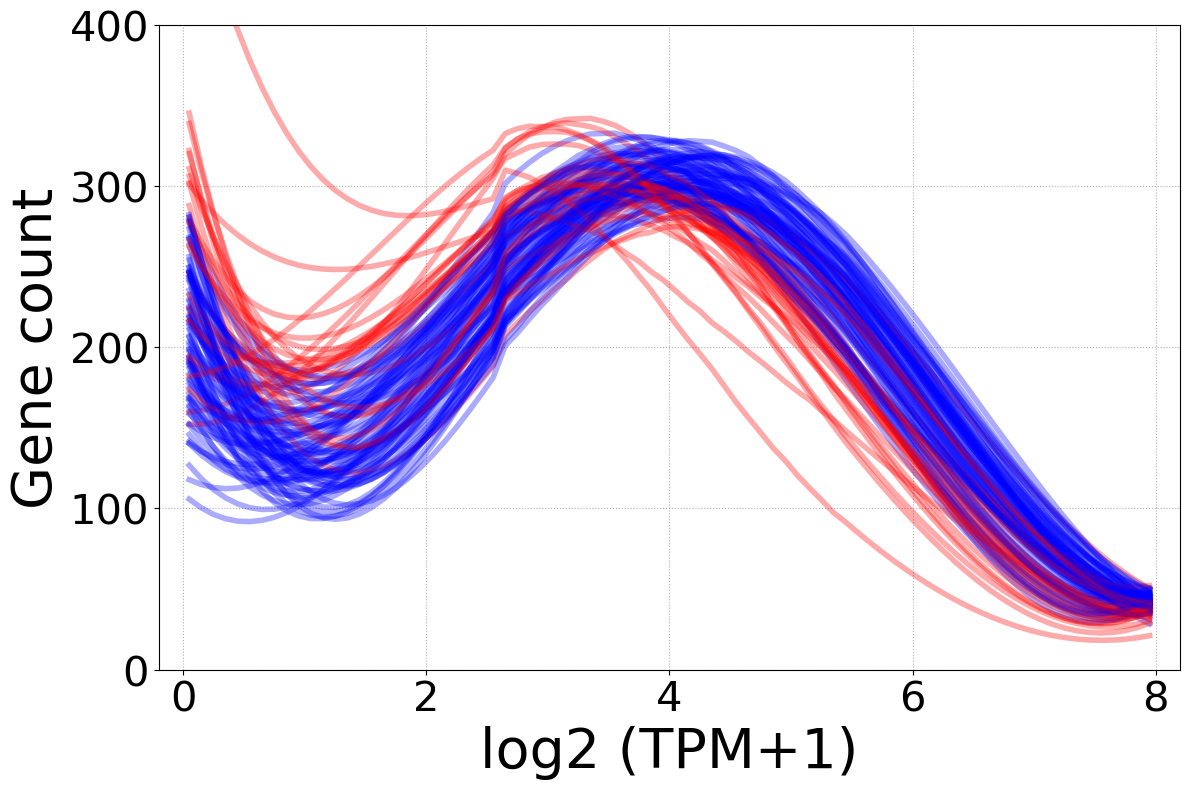

In [17]:
for i in range(len(working_samples)):
    if working_samples[i] in suspicious_samples:
        matplotlib.pyplot.plot(plotting_x, all_hats[i], '-', lw=4, alpha=1/3, color='red')
    else:
        matplotlib.pyplot.plot(plotting_x, all_hats[i], '-', lw=4, alpha=1/3, color='blue')
    
matplotlib.pyplot.xlim([numpy.min(plotting_x)-0.25, numpy.max(plotting_x)+0.25])
matplotlib.pyplot.ylim([0, 400])

matplotlib.pyplot.xlabel('log2 (TPM+1)')
matplotlib.pyplot.ylabel('Gene count')
matplotlib.pyplot.grid(ls=':')
#matplotlib.pyplot.legend(ncol=10, fontsize=12, bbox_to_anchor=(1.02, 1.25))

matplotlib.pyplot.tight_layout()

In [18]:

#We use '.transpose()' function to change df format so we obtain values that were in columns now in rows and viceversa
transpose = log2_tpm_PO.transpose()
print(transpose.shape)
transpose.head()

(100, 15971)


gene_id,ENSG00000000003.15,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,ENSG00000001460.18,ENSG00000001461.17,...,ENSG00000288046.1,ENSG00000288047.1,ENSG00000288066.1,ENSG00000288075.1,ENSG00000288398.1,ENSG00000288547.3,ENSG00000288558.2,ENSG00000288573.1,ENSG00000288596.2,ENSG00000288670.1
00f54652-691e-4446-869a-4dd51c236f56,4.351367,5.374890,2.585011,2.610275,3.133695,5.695910,3.336098,4.101995,2.679424,5.199743,...,0.167486,0.000000,4.540815,0.374288,2.895574,2.705779,1.971516,2.541118,3.140697,2.961197
017f7806-7804-43b9-8123-e1b48d2d6496,5.036846,6.403392,2.647729,3.567631,7.188441,5.396410,3.753476,4.853177,2.432612,5.337971,...,0.092884,0.000000,3.651006,0.314174,2.273247,0.640251,1.055196,1.498149,2.158919,3.231171
02baceff-cbab-41cb-b801-be18ad6991b2,6.354911,6.936608,3.908717,3.186786,5.688273,5.910279,4.933129,5.779504,2.667438,5.551842,...,3.793532,0.096532,5.702602,1.829281,4.697963,0.880019,3.231156,3.072192,3.460860,4.651649
036f7712-a636-4198-b568-6c85d9db4a3b,5.400657,5.871459,2.423874,4.123310,6.598810,5.631902,3.638711,4.427928,2.903366,5.438586,...,0.041664,0.000000,4.115466,3.195820,3.041839,0.882056,1.190488,0.911193,1.627000,3.092241
0386037f-728c-47b0-93d0-6bb81b8b2a05,5.331845,6.195989,2.458723,2.984334,2.575216,6.038208,4.588091,4.207721,3.067725,5.763497,...,0.993711,0.135141,5.417728,1.151274,4.091810,4.018892,2.295488,1.917890,1.813771,4.301668


In [19]:
from scipy.stats import zscore

# We have a DataFrame called 'log2_tpm_PO' with gene expresion data and we want to distinguish the top_500 genes frfom the 
#other ones. Top 500 genes are the ones with higher mean and higher variance. 

# Calcula la media y la varianza de expresión para cada gen
average_expression = log2_tpm_PO.mean(axis=1)
variance_by_rows = log2_tpm_PO.var(axis=1)

# Calcula los puntajes Z para las columnas 'Average' y 'Variance'
average_zscores = zscore(average_expression)
variance_zscores = zscore(variance_by_rows)

# Calcula el puntaje de bondad sumando los puntajes Z de media y varianza
goodness_score = average_zscores + variance_zscores

# Crea un DataFrame con los puntajes de bondad y los nombres de los genes
genes_exp = pd.DataFrame({'Goodness_Score': goodness_score, 'Gene_Name': log2_tpm_PO.index})

# Selecciona los 500 genes con los puntajes de bondad más altos
top_genes = genes_exp.nlargest(500, 'Goodness_Score')

#Select the 50 top genes 
top_50_genes = genes_exp.nlargest(50, 'Goodness_Score')


# Muestra los primeros 5 genes en la lista de los mejores 500 genes
print(top_genes.head(5))


                    Goodness_Score           Gene_Name
gene_id                                               
ENSG00000211592.8        17.368702   ENSG00000211592.8
ENSG00000211896.7        17.244465   ENSG00000211896.7
ENSG00000239951.1        14.040295   ENSG00000239951.1
ENSG00000125144.14       13.858323  ENSG00000125144.14
ENSG00000168878.19       13.654860  ENSG00000168878.19


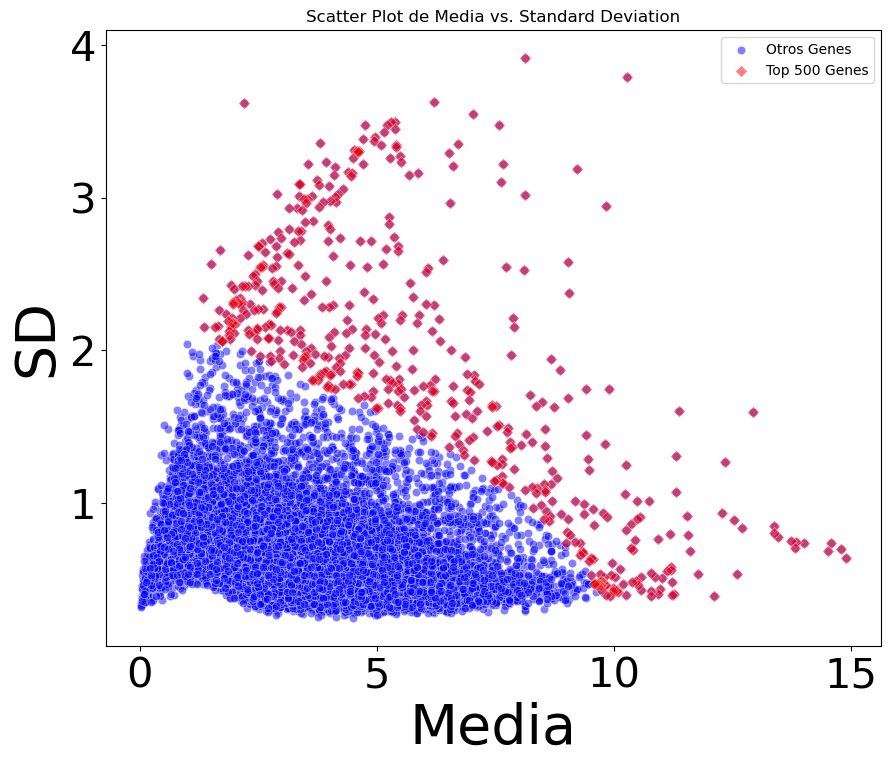

In [20]:
'''scatterplot with standard deviation'''

# Calcular la media y la desviación estándar para cada gen
media = transpose.mean()
std_dev = transpose.std()

# Crear un DataFrame con las medias y desviaciones estándar
data_for_scatter = pd.DataFrame({'Media': media, 'Desviación Estándar': std_dev})

# Crear un scatter plot
plt.figure(figsize=(10, 8))

mida=10

# Crear un scatter plot con todos los genes en azul y forma circular
sns.scatterplot(x='Media', y='Desviación Estándar', data=data_for_scatter, color='blue', alpha=1/2, label='Otros Genes')

# Crear un scatter plot con los 500 mejores genes en rojo y forma cuadrada
sns.scatterplot(x='Media', y='Desviación Estándar', data=data_for_scatter.loc[top_genes.index], color='red', marker='D', alpha=1/2, label='Top 500 Genes')

# Personalizar el scatter plot
plt.title('Scatter Plot de Media vs. Standard Deviation')
plt.xlabel('Media')
plt.ylabel('SD')

# Mostrar el scatter plot con una leyenda
plt.legend()

# Mostrar el scatter plot
plt.show()

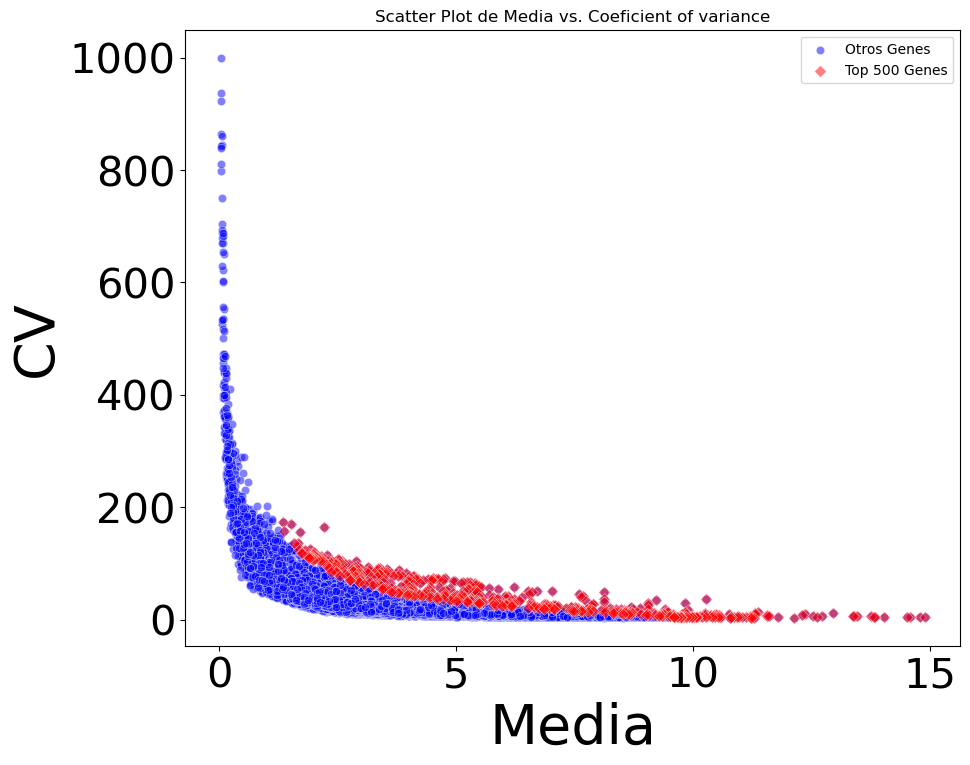

'fix a threshold '

In [21]:
'''SCATTERPLOT WITH COEFICIENT OF VARIANCE'''

# Calcular la media y la desviación estándar para cada gen
media = transpose.mean()
std_dev = transpose.std()
cv = (std_dev / media) * 100  # Calcula el CV y multiplica por 100 para obtener un porcentaje

# Crear un DataFrame con las medias y desviaciones estándar
data_for_scatter = pd.DataFrame({'Media': media, 'Coeficient of variance': cv})

# Crear un scatter plot
plt.figure(figsize=(10, 8))

mida=10

# Crear un scatter plot con todos los genes en azul y forma circular
sns.scatterplot(x='Media', y='Coeficient of variance', data=data_for_scatter, color='blue', alpha=1/2, label='Otros Genes')

# Crear un scatter plot con los 500 mejores genes en rojo y forma cuadrada
sns.scatterplot(x='Media', y='Coeficient of variance', data=data_for_scatter.loc[top_genes.index], color='red', marker='D', alpha=1/2, label='Top 500 Genes')

# Personalizar el scatter plot
plt.title('Scatter Plot de Media vs. Coeficient of variance')
plt.xlabel('Media')
plt.ylabel('CV')

# Mostrar el scatter plot con una leyenda
plt.legend()

# Mostrar el scatter plot
plt.show()


'''fix a threshold '''

In [22]:
import pandas as pd

# Supongamos que 'top_genes' contiene los nombres de los genes que deseas mantener
important_genes = top_50_genes['Gene_Name'].tolist()

# Filtra las columnas de 'transpose' para mantener solo los genes presentes en 'top_genes'
important_dataframe = transpose[important_genes]
important_dataframe

############################

important_500_genes = top_genes['Gene_Name'].tolist()

important_500_dataframe = transpose[important_500_genes]
important_500_dataframe

gene_id,ENSG00000211592.8,ENSG00000211896.7,ENSG00000239951.1,ENSG00000125144.14,ENSG00000168878.19,ENSG00000211666.2,ENSG00000241351.3,ENSG00000157765.13,ENSG00000164935.6,ENSG00000211677.2,...,ENSG00000171858.18,ENSG00000165215.6,ENSG00000211593.2,ENSG00000187823.3,ENSG00000233276.7,ENSG00000167526.14,ENSG00000260260.1,ENSG00000187514.17,ENSG00000132329.11,ENSG00000167600.14
00f54652-691e-4446-869a-4dd51c236f56,12.654493,11.277781,8.911985,12.736996,1.608289,7.351107,7.335330,4.553698,0.337540,8.776716,...,8.721187,8.921146,2.540399,2.988394,9.920799,9.351526,7.250820,9.665024,1.405557,2.208299
017f7806-7804-43b9-8123-e1b48d2d6496,11.151510,7.076933,7.212101,6.330119,7.124737,6.624360,6.257705,11.871646,3.756586,9.133247,...,9.479284,9.247202,2.118825,0.907044,9.830010,9.663139,5.929171,9.151357,1.942233,4.780845
02baceff-cbab-41cb-b801-be18ad6991b2,13.240121,11.884235,9.081297,12.642475,6.320519,7.814719,8.420038,4.733897,0.116498,9.284320,...,9.815587,8.721109,3.939819,0.162468,8.264824,9.420460,8.722053,9.636983,2.067363,0.982583
036f7712-a636-4198-b568-6c85d9db4a3b,15.350830,13.716034,10.326256,4.589626,11.611193,10.106444,9.531090,11.802537,8.109513,10.037491,...,9.526233,9.239901,3.607283,0.655993,9.816799,9.575864,5.664491,9.049094,5.041370,5.231498
0386037f-728c-47b0-93d0-6bb81b8b2a05,8.687352,6.493431,3.608040,15.310996,0.297015,3.002288,2.731270,4.926365,0.110497,5.477386,...,9.395862,8.170200,0.000000,1.865642,9.851994,9.192269,8.431559,9.756803,2.250658,0.776609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35289859-058f-47f9-b2ad-b307bb2b73d0,7.752307,6.070258,3.516935,2.015462,9.943947,3.489659,1.999387,11.917174,7.581055,4.595653,...,9.935792,9.802346,1.442705,3.500853,9.664514,10.119626,7.775010,10.083674,5.687940,5.805354
3682a3e2-17ed-4f6c-b4de-9057e6d7f4c6,16.912659,14.579910,12.534578,10.563863,6.606977,10.875888,10.553912,10.088278,1.185042,11.901181,...,9.023586,8.906719,5.588936,0.451857,9.704892,9.246225,6.943803,9.267229,1.268554,3.667427
3762f95e-180b-43c2-967c-0e138fb23b63,11.195699,8.125541,6.782918,2.375957,10.113615,6.514843,6.696038,12.427053,6.390295,8.081090,...,9.432547,9.027338,0.000000,0.000000,9.983129,9.686237,5.277196,8.995290,2.434215,6.635944
37b4e91b-642e-48ec-a36f-bb159f2ddb8a,7.183234,4.846909,3.515284,11.814247,5.624028,3.603051,2.451330,4.588685,1.129019,2.692650,...,9.602118,9.875355,1.892158,0.235727,8.759496,9.286884,8.145641,9.805699,2.559883,1.004753


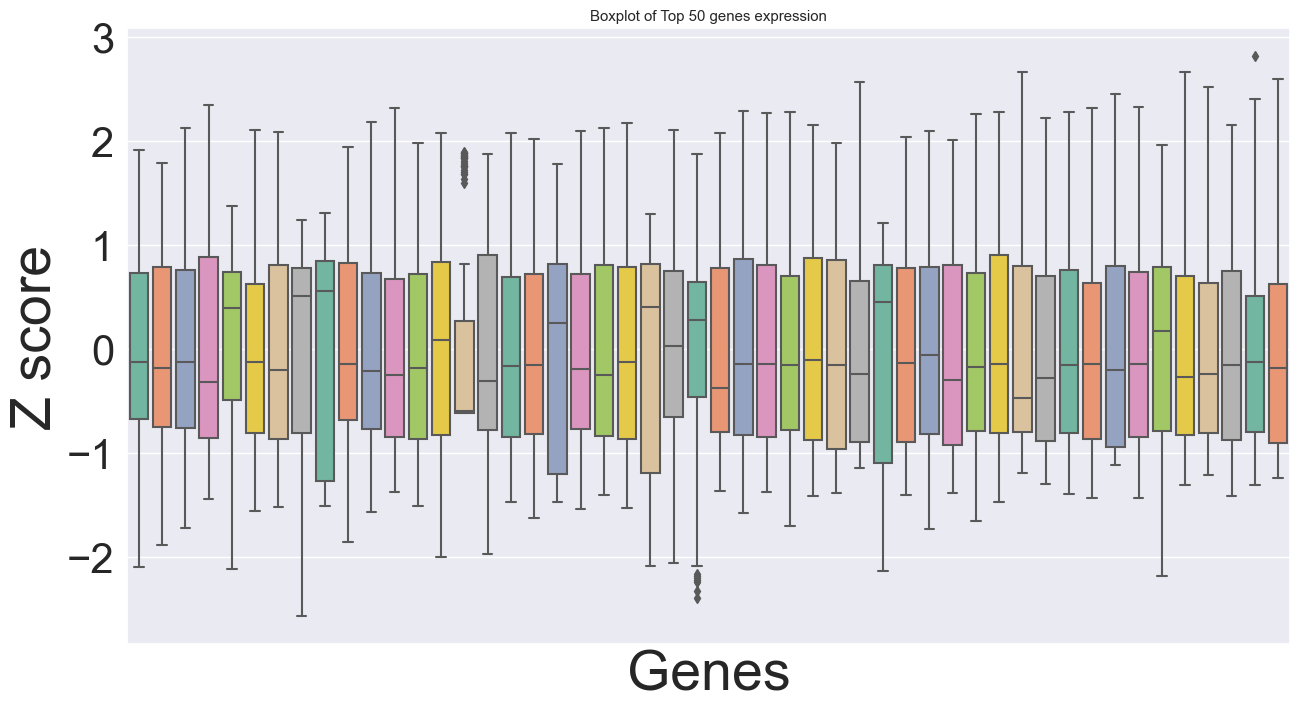

In [60]:
'''This boxplot shows gene expression  data that has been normalized through Z-score standarizationusing Seaborn
and Matplotlib'''


scaler = StandardScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(important_dataframe), columns=important_dataframe.columns)

# Crea un boxplot para la gene expression data normalizada
plt.figure(figsize=(15, 8))
sns.boxplot(data=normalized_data, orient="v", palette="Set2")

# Personaliza el gráfico
plt.ylabel('Z score')
plt.xlabel('Genes')
plt.title('Boxplot of Top 50 genes expression')

# Puedes agregar plt.xticks([]) si deseas ocultar las etiquetas del eje x
plt.xticks([])

# Muestra el gráfico
plt.show()


In [25]:
normalized_data

gene_id,ENSG00000211592.8,ENSG00000211896.7,ENSG00000239951.1,ENSG00000125144.14,ENSG00000168878.19,ENSG00000211666.2,ENSG00000241351.3,ENSG00000157765.13,ENSG00000164935.6,ENSG00000211677.2,...,ENSG00000211651.3,ENSG00000211947.2,ENSG00000276775.1,ENSG00000211966.2,ENSG00000133048.13,ENSG00000211943.2,ENSG00000241755.1,ENSG00000211938.2,ENSG00000211934.3,ENSG00000211937.3
0,0.629647,0.810059,0.746763,1.616902,-1.726235,0.563265,0.585348,-1.469085,-1.414208,0.618019,...,1.120566,0.195504,1.092243,0.056828,-0.585965,-0.421152,0.331943,0.769797,0.548567,0.121980
1,0.231245,-0.267419,0.276014,-0.198851,-0.132083,0.354268,0.275871,0.835827,-0.425046,0.724907,...,1.977590,0.308500,0.464222,0.362750,0.546170,0.478372,0.309114,0.618483,-0.376946,-0.165456
2,0.784883,0.965609,0.793651,1.590114,-0.364487,0.696590,0.896860,-1.412329,-1.478158,0.770199,...,0.896571,1.673967,0.904597,1.004297,-1.108297,0.773768,0.599382,0.919136,0.599485,0.789991
3,1.344378,1.435448,1.138418,-0.692119,1.164422,1.355640,1.215938,0.814060,0.834296,0.995999,...,1.506369,1.276066,2.258165,0.630820,1.025100,1.230556,1.513213,0.883182,1.472859,1.498721
4,-0.421941,-0.417082,-0.722060,2.346391,-2.105170,-0.687360,-0.736868,-1.351708,-1.479894,-0.371119,...,-0.551376,-0.055020,-1.052370,-0.364150,-2.179598,-0.637826,-0.614809,-0.452012,0.122645,-0.406995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.669797,-0.525621,-0.747289,-1.421655,0.682618,-0.547203,-0.947054,0.850167,0.681408,-0.635463,...,-0.899079,-0.882456,-0.742800,-0.767965,0.136378,-0.946295,-0.823863,-1.067685,-0.675769,-0.942727
96,1.758379,1.657025,1.749969,1.001021,-0.281706,1.576915,1.509677,0.274125,-1.169018,1.554733,...,1.228339,1.937506,1.823724,1.179000,-0.085755,1.714434,2.517578,1.556032,1.148785,1.427974
97,0.242958,0.001539,0.157160,-1.319488,0.731649,0.322774,0.401753,1.010762,0.336910,0.409471,...,0.315789,0.316592,0.948984,0.487474,0.128048,0.428817,-0.037054,0.366119,-0.379443,0.488219
98,-0.820644,-0.839399,-0.747747,1.355388,-0.565760,-0.514594,-0.817263,-1.458066,-1.185226,-1.205982,...,-1.009306,-1.041404,-0.746210,-0.981865,-0.858606,-0.949707,-0.323556,-0.884270,-0.813172,-0.831130


In [26]:
scaler = StandardScaler()
normalized_500 = pd.DataFrame(scaler.fit_transform(important_500_dataframe), columns=important_500_dataframe.columns)
normalized_500

gene_id,ENSG00000211592.8,ENSG00000211896.7,ENSG00000239951.1,ENSG00000125144.14,ENSG00000168878.19,ENSG00000211666.2,ENSG00000241351.3,ENSG00000157765.13,ENSG00000164935.6,ENSG00000211677.2,...,ENSG00000171858.18,ENSG00000165215.6,ENSG00000211593.2,ENSG00000187823.3,ENSG00000233276.7,ENSG00000167526.14,ENSG00000260260.1,ENSG00000187514.17,ENSG00000132329.11,ENSG00000167600.14
0,0.629647,0.810059,0.746763,1.616902,-1.726235,0.563265,0.585348,-1.469085,-1.414208,0.618019,...,-2.013857,-0.102624,0.389916,0.114611,0.774781,-0.537018,-0.194454,0.169445,-1.461834,-0.797228
1,0.231245,-0.267419,0.276014,-0.198851,-0.132083,0.354268,0.275871,0.835827,-0.425046,0.724907,...,-0.368101,0.341512,0.184155,-0.970485,0.600820,0.126238,-1.358081,-0.932457,-1.154701,0.637532
2,0.784883,0.965609,0.793651,1.590114,-0.364487,0.696590,0.896860,-1.412329,-1.478158,0.770199,...,0.361982,-0.375105,1.072941,-1.358664,-2.398226,-0.390293,1.100871,0.109292,-1.083091,-1.480834
3,1.344378,1.435448,1.138418,-0.692119,1.164422,1.355640,1.215938,0.814060,0.834296,0.995999,...,-0.266178,0.331567,0.910638,-1.101368,0.575506,-0.059523,-1.591114,-1.151828,0.618896,0.888870
4,-0.421941,-0.417082,-0.722060,2.346391,-2.105170,-0.687360,-0.736868,-1.351708,-1.479894,-0.371119,...,-0.549202,-1.125524,-0.849996,-0.470727,0.642943,-0.875990,0.845110,0.366328,-0.978193,-1.595710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.669797,-0.525621,-0.747289,-1.421655,0.682618,-0.547203,-0.947054,0.850167,0.681408,-0.635463,...,0.622935,1.097700,-0.145844,0.381778,0.283713,1.097853,0.267061,1.067520,0.988920,1.208921
96,1.758379,1.657025,1.749969,1.001021,-0.281706,1.576915,1.509677,0.274125,-1.169018,1.554733,...,-1.357378,-0.122276,1.877838,-1.207793,0.361082,-0.761146,-0.464763,-0.683892,-1.540239,0.016557
97,0.242958,0.001539,0.157160,-1.319488,0.731649,0.322774,0.401753,1.010762,0.336910,0.409471,...,-0.469561,0.042025,-0.849996,-1.443365,0.894211,0.175402,-1.932102,-1.267247,-0.873146,1.672158
98,-0.820644,-0.839399,-0.747747,1.355388,-0.565760,-0.514594,-0.817263,-1.458066,-1.185226,-1.205982,...,-0.101439,1.197150,0.073524,-1.320471,-1.450388,-0.674605,0.593378,0.471216,-0.801228,-1.468469


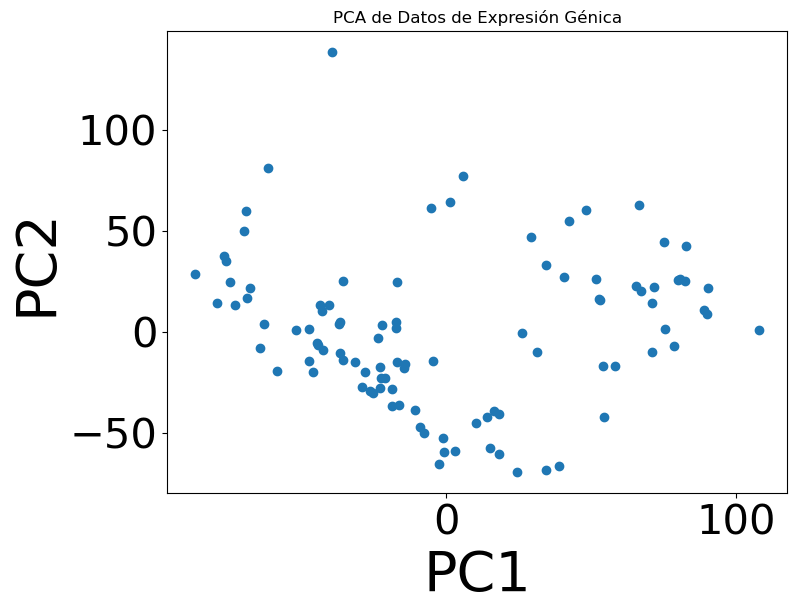

In [27]:
from sklearn.decomposition import PCA
n_componentes = 2  # Elige el número de componentes principales que deseas
pca = PCA(n_components=n_componentes)
componentes_principales = pca.fit_transform(transpose)

plt.figure(figsize=(8, 6))
plt.scatter(componentes_principales[:, 0], componentes_principales[:, 1])
plt.xlabel('PC1')  
plt.ylabel('PC2')  
plt.title('PCA de Datos de Expresión Génica')
plt.show()



In [28]:
#remove low quality samples 
strict = transpose.drop(index=['00f54652-691e-4446-869a-4dd51c236f56', '036f7712-a636-4198-b568-6c85d9db4a3b', '0386037f-728c-47b0-93d0-6bb81b8b2a05', '0cfde228-89bc-4454-a894-d6fc4b032892', '144be06b-54da-4b42-a219-8bbe88cc7f78', '153946fb-8375-4d84-ad2f-2988722b845e', '164fe0cc-c07d-4d09-adfd-cca86b737aa3', '185ecfd0-680c-4874-8667-5d7543ec562c', '193da121-43e7-40ab-8e0e-980c62586568', '1c4e7140-e649-4267-92ac-f30d65d795e5', '1e100c4d-13eb-4e5a-9117-ead385902710', '1e31f670-de56-4122-8966-42767135b420', '1ff78fb6-b27a-4946-b39f-c87d6dfa669d', '20c70125-f4ec-4d52-9efd-a207b559fedc', '2231c28a-bf18-4c0c-885c-42896df3b0e8', '284b2aab-f424-43d3-b160-78f2c28ecf94', '28da87d8-0ac9-4a62-9591-67a713bfe4e7', '28ecaa28-d2dc-4988-a484-544d4ad7355d', '2a51bda3-fb5e-4eb6-bc86-e78dca8c4e2b', '2a90f5ad-a9d0-4f5d-a255-3e8233039868', '2b7a660d-f472-476a-9145-cae4f3ba5e4c', '2df38eb8-5350-4951-9159-a8add6474efe', '2ea7afdd-f947-47e6-9516-b6f38e0a1967', '30b75646-82f8-467f-8f2b-b71b97af3bc6', '3682a3e2-17ed-4f6c-b4de-9057e6d7f4c6', '3762f95e-180b-43c2-967c-0e138fb23b63']) #canviar el nom de la mostra que cal eliminar 
print(strict.shape)
strict.head()


'''PORTAR A DALT'''

(74, 15971)


'PORTAR A DALT'

In [29]:
features = strict.columns
x = strict.loc[:, features].values
 
x = sklearn.preprocessing.StandardScaler().fit_transform(x)
pca = sklearn.decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pandas.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
x

array([[-1.29424197, -0.17027955, -1.30476628, ..., -0.84071518,
        -0.93682978, -1.64572909],
       [ 1.42801083,  1.68358672,  1.97664078, ...,  1.89377158,
         1.77861357,  2.0138982 ],
       [ 0.53035333,  1.03642228,  1.92813514, ..., -0.33634607,
        -0.25395582,  0.79453737],
       ...,
       [ 1.95824815,  0.70351439,  0.41849235, ...,  0.20209801,
         0.72229767, -0.08310443],
       [ 0.02469088,  1.96562061,  0.3608523 , ...,  1.15885743,
        -0.16470289, -1.06431622],
       [ 1.62007577,  0.42519948,  1.27042932, ...,  1.3331273 ,
         1.8759215 ,  0.20614765]])

In [30]:
pca.explained_variance_ratio_

array([0.27422943, 0.1163158 ])

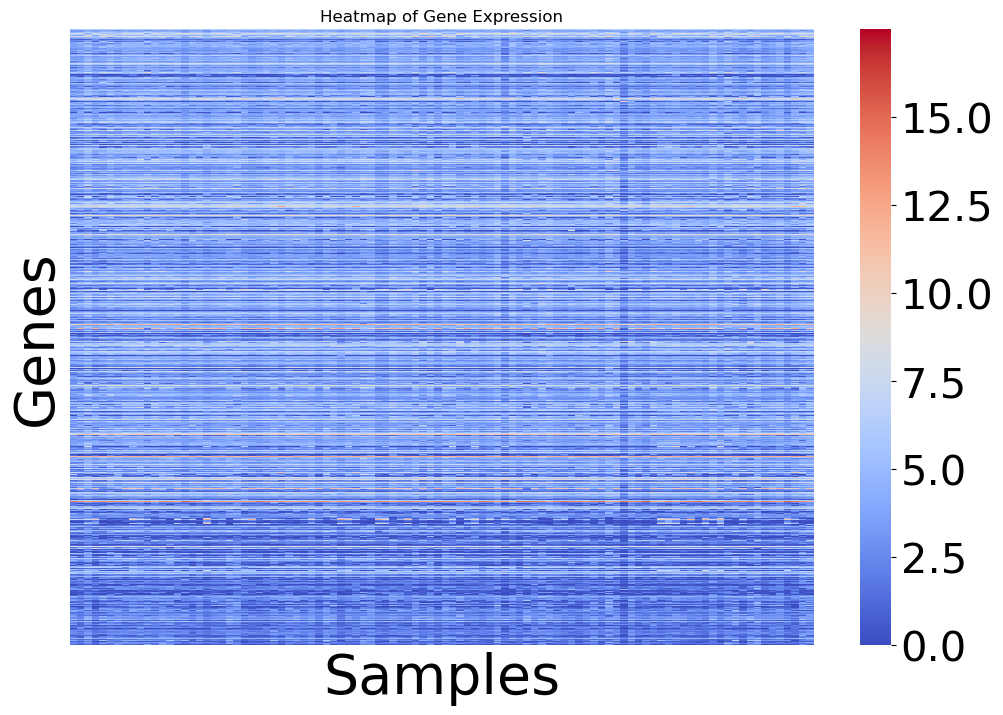

In [31]:
'''HEATMAP OF GENE EXPRESSION AMB LOG2_TPM+1  ---> ARREGLAR, ferlo sobre el z-score'''

plt.figure(figsize=(12, 8))  # Set the figure size as needed
sns.heatmap(log2_tpm_PO, cmap='coolwarm', annot=False, cbar=True)

# Customize the plot
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.title('Heatmap of Gene Expression')

plt.xticks([])
plt.yticks([])

# Show the plot
plt.show()


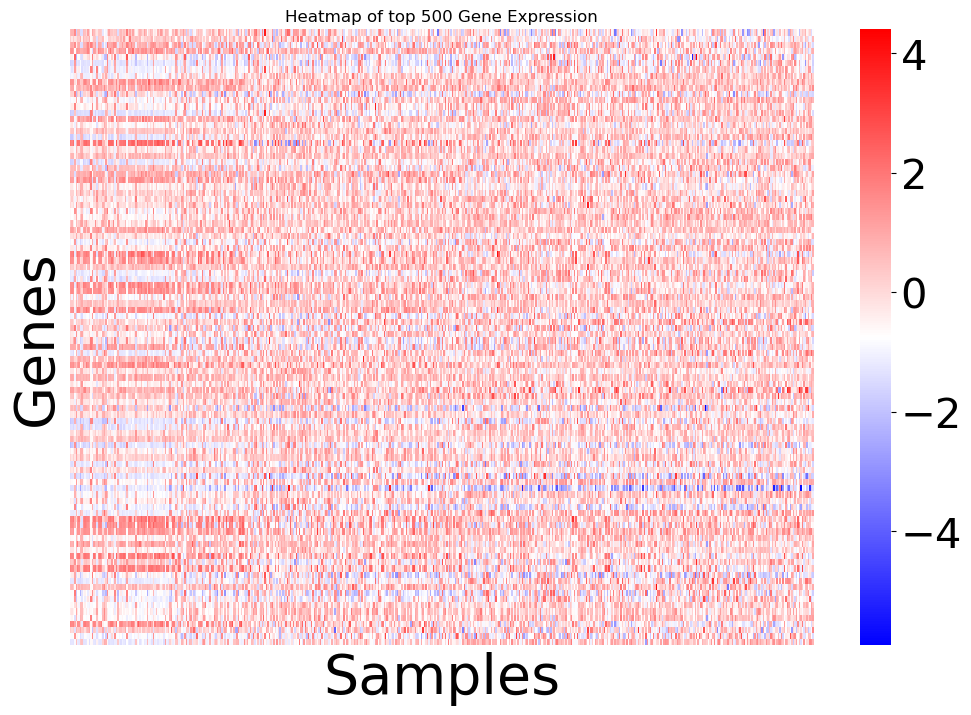

In [32]:
'''Z-SCORE HEATMAP'''


plt.figure(figsize=(12, 8))  # Set the figure size as needed
sns.heatmap(normalized_500, cmap='bwr', annot=False, cbar=True)

# Customize the plot
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.title('Heatmap of top 500 Gene Expression')

plt.xticks([])
plt.yticks([])

# Show the plot
plt.show()

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


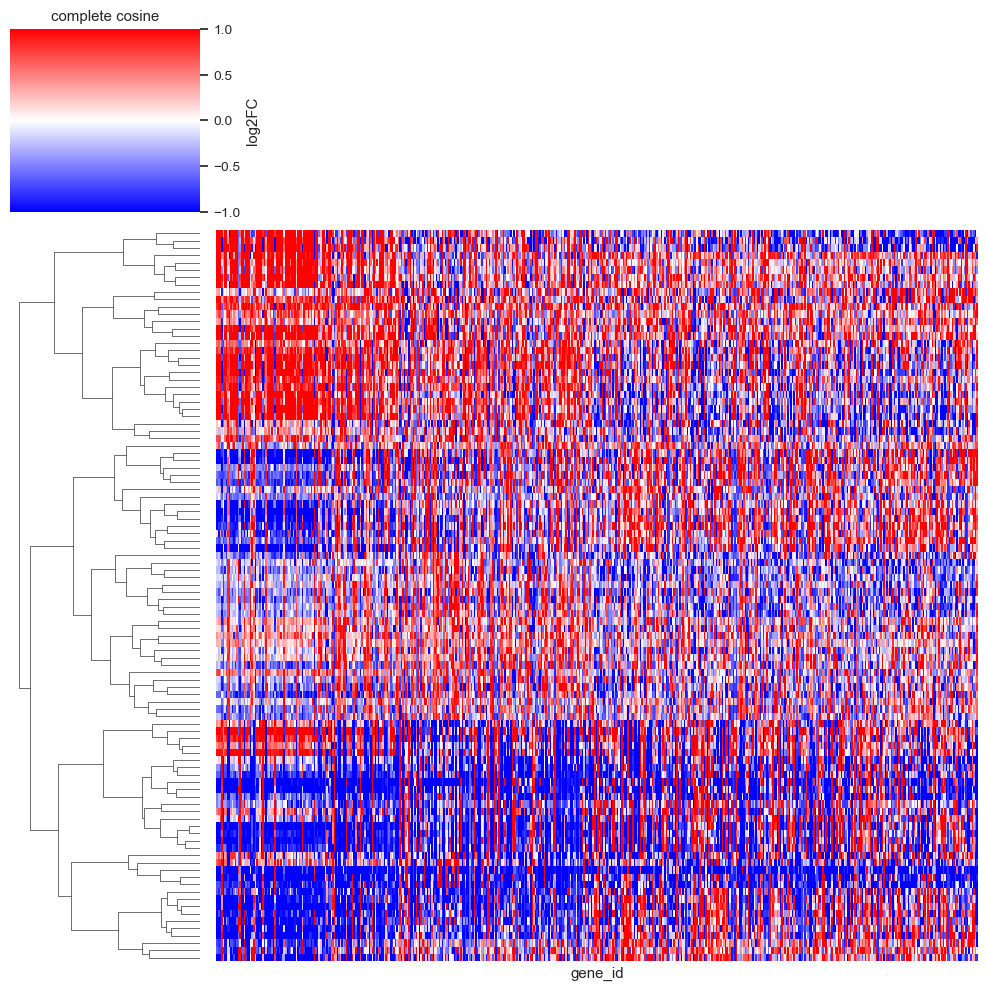

In [33]:
linkage_method = 'complete'
distance_metric = 'cosine'

seaborn.set(font_scale=0.9)
seaborn.clustermap(normalized_500, cmap='bwr', col_cluster=False, vmin=-1, vmax=1, method=linkage_method, metric=distance_metric, yticklabels=[], xticklabels = [], cbar_kws={'label':'log2FC'})


matplotlib.pyplot.title('{} {}'.format(linkage_method, distance_metric))
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()



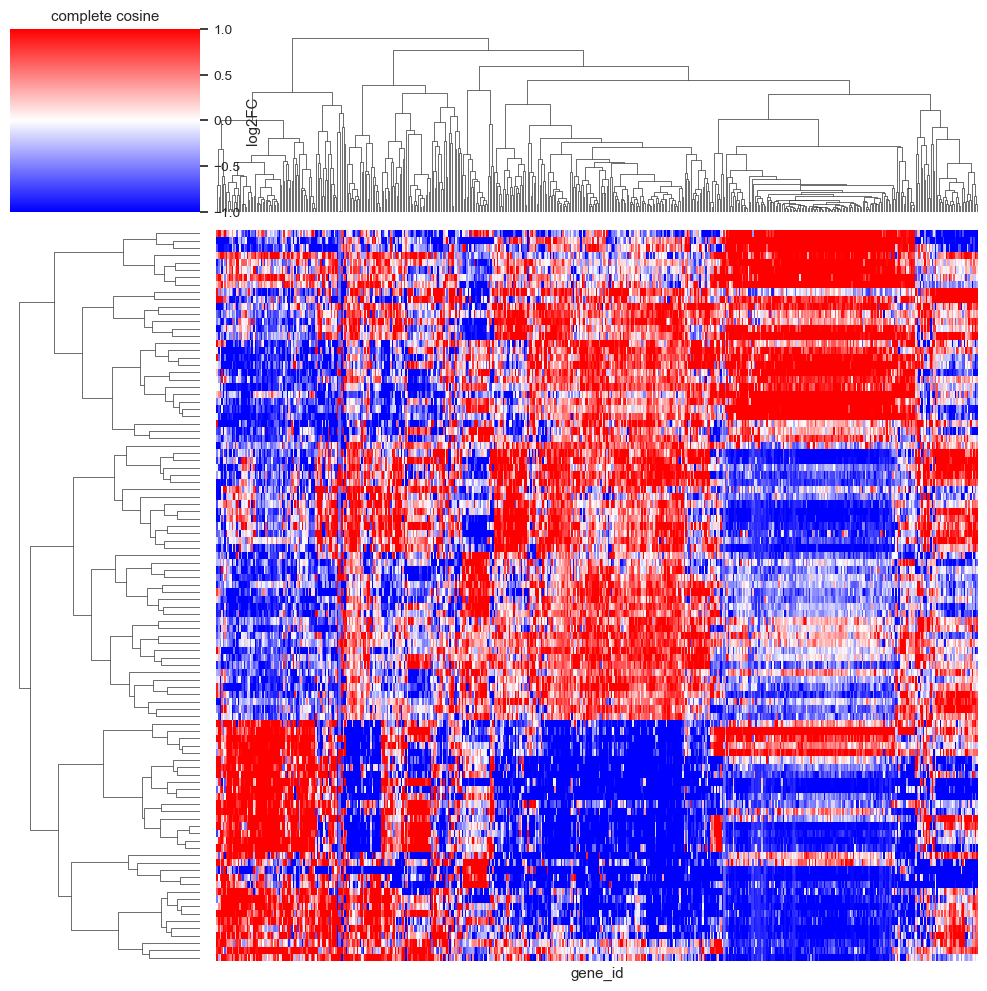

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

linkage_method = 'complete'
distance_metric = 'cosine'

sns.set(font_scale=0.9)
sns.clustermap(
    normalized_500,  # Tus datos normalizados
    cmap='bwr',   # Mapa de colores
    col_cluster=True,  # Realizar clustering en el eje de las columnas
    row_cluster=True,  # Realizar clustering en el eje de las filas
    vmin=-1,  # Valor mínimo en el mapa de colores
    vmax=1,   # Valor máximo en el mapa de colores
    method=linkage_method,  # Método de enlace para el clustering
    metric=distance_metric,  # Métrica de distancia
    yticklabels=[],  # Mostrar etiquetas en el eje y
    xticklabels=[],  # Etiquetas en el eje x
    cbar_kws= {'label': 'log2FC'}  # Etiqueta para la barra de color

)



plt.title('{} {}'.format(linkage_method, distance_metric))
plt.tight_layout()
plt.show()


In [41]:


# Aplicar Quantile Normalization
quantile_normalized_data_500 = quantile_transform(normalized_500, n_quantiles=normalized_500.shape[0], copy=True)

# Convierte el resultado en un DataFrame
quantile_normalized_500 = pd.DataFrame(quantile_normalized_data, columns=normalized_500.columns, index=normalized_500.index)

# Ahora, quantile_normalized_df contiene los datos con Quantile Normalization aplicado.


In [46]:
quantile_normalized_500

gene_id,ENSG00000211592.8,ENSG00000211896.7,ENSG00000239951.1,ENSG00000125144.14,ENSG00000168878.19,ENSG00000211666.2,ENSG00000241351.3,ENSG00000157765.13,ENSG00000164935.6,ENSG00000211677.2,...,ENSG00000171858.18,ENSG00000165215.6,ENSG00000211593.2,ENSG00000187823.3,ENSG00000233276.7,ENSG00000167526.14,ENSG00000260260.1,ENSG00000187514.17,ENSG00000132329.11,ENSG00000167600.14
0,0.727273,0.757576,0.747475,0.939394,0.090909,0.737374,0.676768,0.111111,0.101010,0.717172,...,0.040404,0.444444,0.737374,0.494949,0.848485,0.232323,0.434343,0.565657,0.090909,0.292929
1,0.585859,0.424242,0.606061,0.535354,0.383838,0.666667,0.606061,0.838384,0.353535,0.727273,...,0.313131,0.666667,0.646465,0.272727,0.808081,0.585859,0.080808,0.161616,0.151515,0.646465
2,0.757576,0.777778,0.767677,0.929293,0.313131,0.757576,0.767677,0.131313,0.040404,0.737374,...,0.636364,0.272727,0.808081,0.111111,0.030303,0.292929,0.888889,0.525253,0.171717,0.151515
3,0.878788,0.888889,0.828283,0.343434,0.929293,0.858586,0.838384,0.777778,0.737374,0.787879,...,0.343434,0.646465,0.797980,0.252525,0.777778,0.424242,0.070707,0.080808,0.707071,0.797980
4,0.353535,0.353535,0.282828,1.000000,0.010101,0.282828,0.313131,0.141414,0.030303,0.393939,...,0.212121,0.080808,0.000000,0.353535,0.828283,0.131313,0.757576,0.626263,0.222222,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.252525,0.333333,0.262626,0.020202,0.707071,0.323232,0.191919,0.848485,0.585859,0.292929,...,0.747475,0.919192,0.535354,0.595960,0.575758,0.909091,0.555556,0.858586,0.828283,0.969697
96,0.989899,0.959596,0.969697,0.787879,0.343434,0.919192,0.929293,0.434343,0.303030,0.949495,...,0.080808,0.414141,0.949495,0.202020,0.606061,0.191919,0.363636,0.252525,0.070707,0.373737
97,0.606061,0.555556,0.565657,0.030303,0.747475,0.626263,0.616162,0.979798,0.434343,0.656566,...,0.292929,0.494949,0.000000,0.000000,0.898990,0.626263,0.010101,0.050505,0.242424,1.000000
98,0.212121,0.202020,0.252525,0.878788,0.232323,0.363636,0.262626,0.121212,0.292929,0.121212,...,0.444444,0.949495,0.616162,0.141414,0.070707,0.212121,0.636364,0.717172,0.262626,0.161616


C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


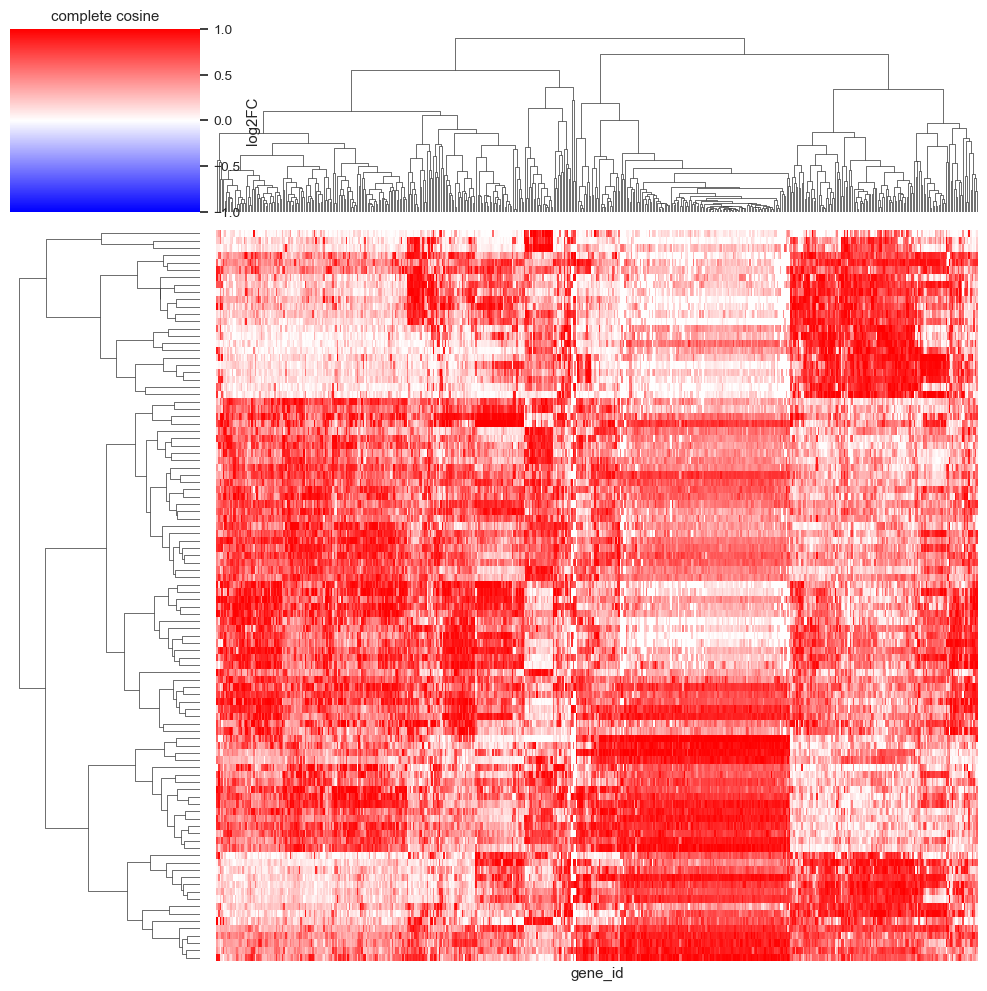

In [42]:
'''CLUSTERED HEATMAP AFTER QUANTILE NORMALIZATION'''

linkage_method = 'complete'
distance_metric = 'cosine'

sns.set(font_scale=0.9)
sns.clustermap(
    quantile_normalized_500,  # Tus datos normalizados
    cmap='bwr',   # Mapa de colores
    col_cluster=True,  # Realizar clustering en el eje de las columnas
    row_cluster=True,  # Realizar clustering en el eje de las filas
    vmin=-1,  # Valor mínimo en el mapa de colores
    vmax=1,   # Valor máximo en el mapa de colores
    method=linkage_method,  # Método de enlace para el clustering
    metric=distance_metric,  # Métrica de distancia
    yticklabels=[],  # Mostrar etiquetas en el eje y
    xticklabels=[],  # Etiquetas en el eje x
    cbar_kws= {'label': 'log2FC'}  # Etiqueta para la barra de color

)



plt.title('{} {}'.format(linkage_method, distance_metric))
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

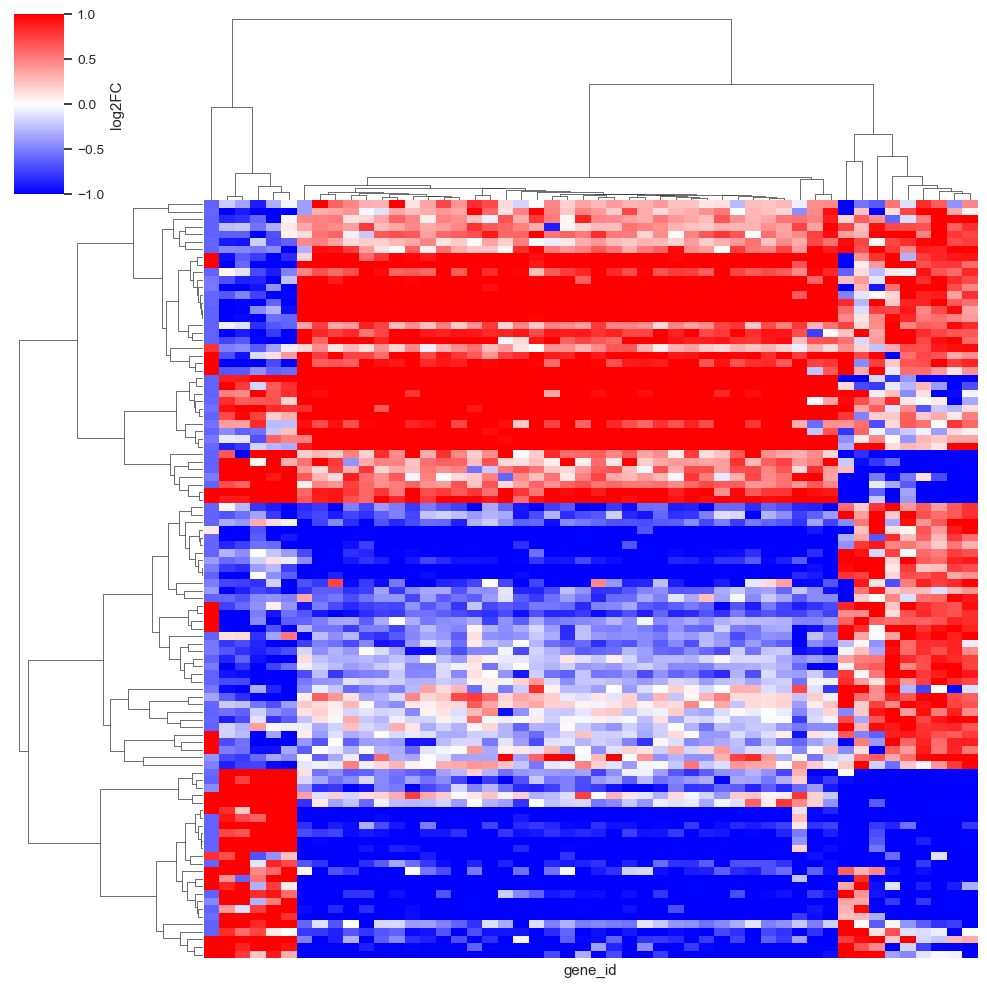

In [38]:
'''HEATMAP of top 50 gene expresion'''

plt.figure(figsize=(12, 8))  # Set the figure size as needed

sns.clustermap(
    normalized_data,  # Tus datos normalizados
    cmap='bwr',   # Mapa de colores
    col_cluster=True,  # Realizar clustering en el eje de las columnas
    row_cluster=True,  # Realizar clustering en el eje de las filas
    vmin=-1,  # Valor mínimo en el mapa de colores
    vmax=1,   # Valor máximo en el mapa de colores
    method=linkage_method,  # Método de enlace para el clustering
    metric=distance_metric,  # Métrica de distancia
    yticklabels=[],  # Mostrar etiquetas en el eje y
    xticklabels=[],  # Etiquetas en el eje x
    cbar_kws= {'label': 'log2FC'}  # Etiqueta para la barra de color
)
# Customize the plot
'''plt.xlabel('Samples')
plt.ylabel('Genes')
plt.title('Heatmap of Gene Expression')

plt.xticks([])
plt.yticks([])'''

# Show the plot
plt.show()

In [ ]:
'''filter out variables that ara not representative 
quantile normalization and heatmaps before and after 
clustering: k means
    metrix: to see which clustering method is the better one '''